## Building a CNN to classify images in the CIFAR-10 Dataset

We will work with the CIFAR-10 Dataset.  This is a well-known dataset for image classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:

<ol start="0">
<li> airplane
<li>  automobile
<li> bird
<li>  cat
<li> deer
<li> dog
<li>  frog
<li>  horse
<li>  ship
<li>  truck
</ol>

For details about CIFAR-10 see:
https://www.cs.toronto.edu/~kriz/cifar.html

For a compilation of published performance results on CIFAR 10, see:
http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

---

### Building Convolutional Neural Nets

In this exercise we will build and train our first convolutional neural networks.  In the first part, we walk through the different layers and how they are configured.  In the second part, you will build your own model, train it, and compare the performance.

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
from utils import load_data

def get_data(num_training=25709, num_validation=3000, num_pub_test=1000, num_pri_test=1000):
    """
    Load the dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test = load_data()
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_pub_test))
    X_pub_test = X_pub_test[mask]
    y_pub_test = y_pub_test[mask]
    mask = list(range(num_pri_test))
    X_pri_test = X_pri_test[mask]
    y_pri_test = y_pri_test[mask]

#     # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_pub_test -= mean_image
    X_pri_test -= mean_image  
    return X_train, y_train, X_val, y_val, X_pub_test, y_pub_test, X_pri_test, y_pri_test
    #return X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_pub_test, y_pub_test
   del X_pri_test, y_pri_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_pub_test, y_pub_test, X_pri_test, y_pri_test = get_data()
#X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test = get_data()

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Public test data shape: ', X_pub_test.shape)
print('Public test labels shape: ', y_pub_test.shape)
print('Private test data shape: ', X_pri_test.shape)
print('Private test labels shape: ', y_pri_test.shape)

Train data shape:  (25709, 48, 48, 1)
Train labels shape:  (25709,)
Validation data shape:  (3000, 48, 48, 1)
Validation labels shape:  (3000,)
Public test data shape:  (1000, 48, 48, 1)
Public test labels shape:  (1000,)
Private test data shape:  (1000, 48, 48, 1)
Private test labels shape:  (1000,)


In [3]:
X_train[444].shape


(48, 48, 1)

3


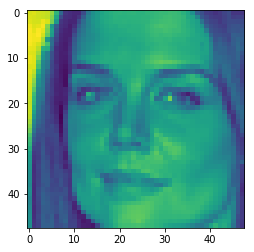

In [4]:
print(y_train[444])
plt.imshow(X_train[444].reshape(48, 48));

In [5]:
num_classes = 7

y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_pub_test = keras.utils.to_categorical(y_pub_test, num_classes)
y_pri_test = keras.utils.to_categorical(y_pri_test, num_classes)

In [6]:
y_train[444]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [7]:
# As before, let's make everything float and scale
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_pub_test = X_pub_test.astype('float32')
X_pri_test = X_pri_test.astype('float32')
print(X_train.shape[1:])
X_train /= 255
X_val /= 255
X_pub_test /= 255
X_pri_test /= 255

(48, 48, 1)


In [23]:
# Please provide your solution here
# Create model_2 as mentioned in the exercise
# Let's build a CNN using Keras' Sequential capabilities
from keras.layers.normalization import BatchNormalization
classifier = Sequential()
classifier.add(Conv2D(16, (3, 3), padding='same', input_shape = (48, 48, 1), activation = 'relu'))
classifier.add(Conv2D(16, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25

# Adding a third convolutional layer
classifier.add(Conv2D(32, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(0.5)) 
classifier.add(Dense(units = 7, activation = 'softmax'))
classifier.summary()
X_train.shape[1:]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 48, 48, 16)        160       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 46, 46, 16)        2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 23, 23, 32)        4640      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 32)        0         
__________

(48, 48, 1)

In [24]:
batch_size = 256
from keras.callbacks import ModelCheckpoint
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0005, decay=1e-6)
sgd = keras.optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)
adam =keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

# Let's train the model using RMSprop
classifier.compile(optimizer = opt,
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

history =classifier.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(X_val, y_val),
              shuffle=True)

Train on 25709 samples, validate on 3000 samples
Epoch 1/10
25709/25709 [==============================] - 33s 1ms/step - loss: 1.8175 - acc: 0.2369 - val_loss: 1.7966 - val_acc: 0.2547
Epoch 2/10
25709/25709 [==============================] - 31s 1ms/step - loss: 1.7808 - acc: 0.2561 - val_loss: 1.7769 - val_acc: 0.2743
Epoch 3/10
25709/25709 [==============================] - 31s 1ms/step - loss: 1.7416 - acc: 0.2903 - val_loss: 1.6922 - val_acc: 0.3590
Epoch 4/10
25709/25709 [==============================] - 32s 1ms/step - loss: 1.6840 - acc: 0.3301 - val_loss: 1.6180 - val_acc: 0.3660
Epoch 5/10
25709/25709 [==============================] - 32s 1ms/step - loss: 1.6467 - acc: 0.3486 - val_loss: 1.5791 - val_acc: 0.4073
Epoch 6/10
25709/25709 [==============================] - 32s 1ms/step - loss: 1.6068 - acc: 0.3708 - val_loss: 1.5361 - val_acc: 0.4070
Epoch 7/10
25709/25709 [==============================] - 32s 1ms/step - loss: 1.5777 - acc: 0.3813 - val_loss: 1.4853 - val_acc:

In [26]:
score = classifier.evaluate(X_pri_test, y_pri_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4289151306152343
Test accuracy: 0.482


Predicted class is: [5]


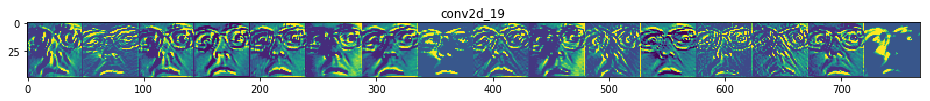

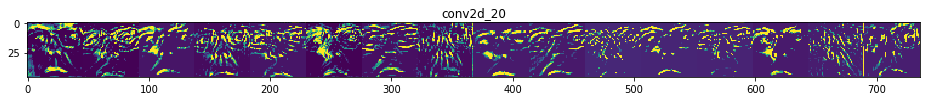

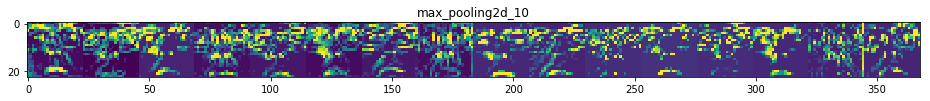

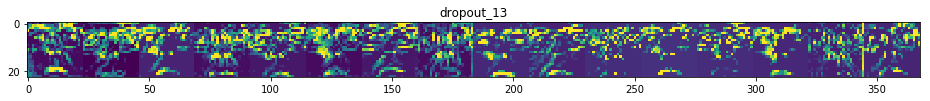

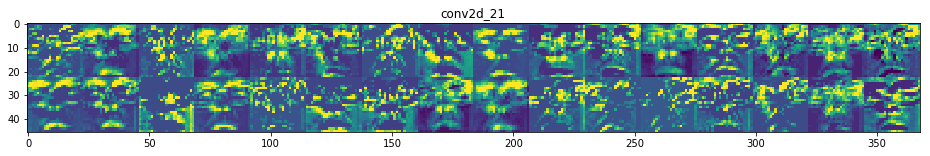

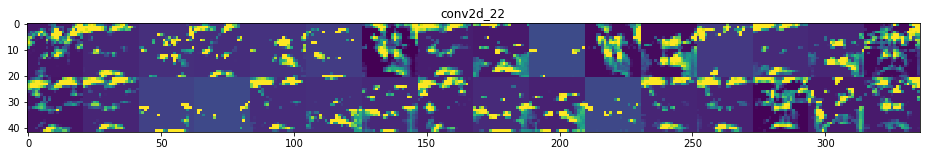

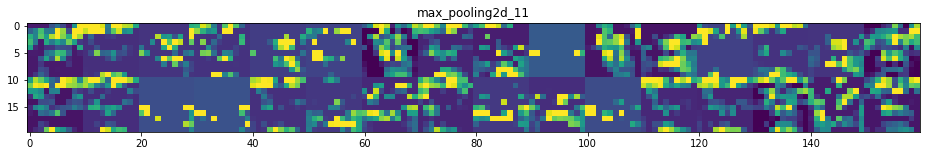

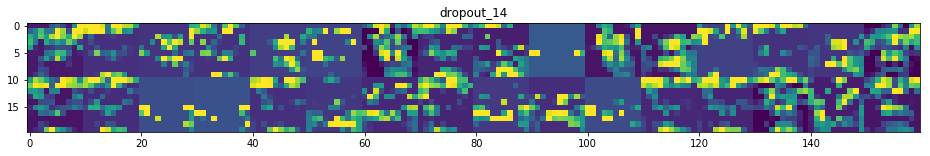

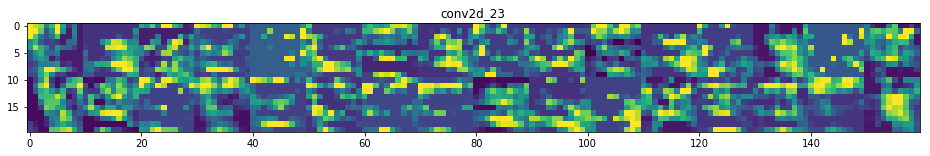

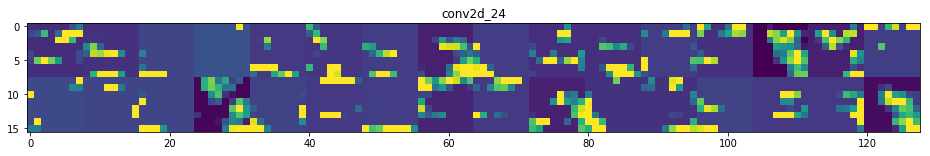

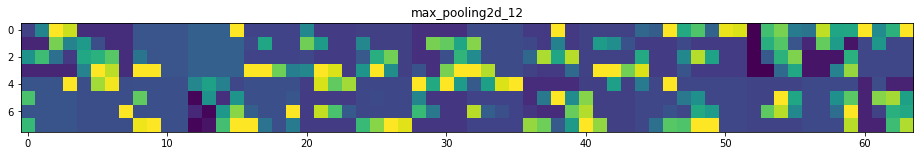

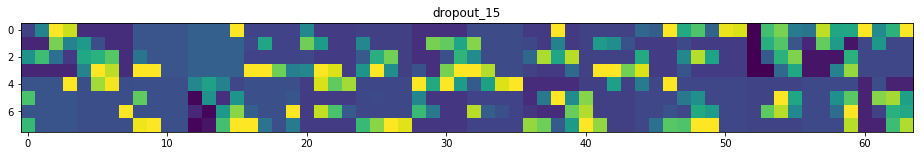

In [37]:
from keras import models
layer_outputs = [layer.output for layer in classifier.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=classifier.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
img_tensor = np.expand_dims(X_val[0], axis=0)
activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation
classes = classifier.predict_classes(img_tensor, batch_size=1)
print("Predicted class is:",classes)
layer_names = []
for layer in classifier.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

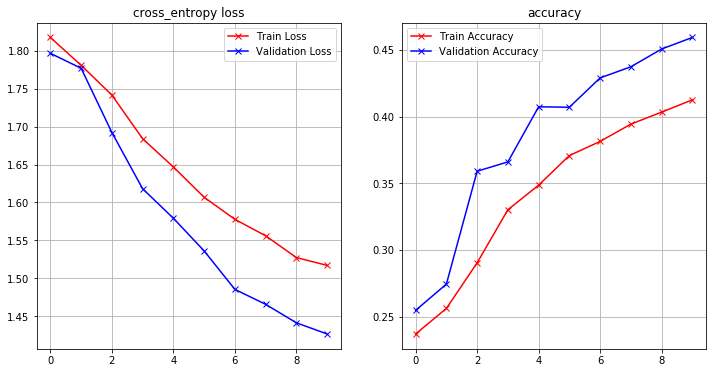

In [32]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

In [35]:
from keras.utils import plot_model
plot_model(classifier, to_file='model.png')

"dot" with args ['-Tpng', '/tmp/tmpuxef0txz'] returned code: 1

stdout, stderr:
 b''
b'Warning: Could not load "/home/minhthong04111989/anaconda3/envs/myproj/lib/graphviz/libgvplugin_pango.so.6" - file not found\nWarning: Could not load "/home/minhthong04111989/anaconda3/envs/myproj/lib/graphviz/libgvplugin_pango.so.6" - file not found\nFormat: "png" not recognized. Use one of: canon cmap cmapx cmapx_np dot dot_json eps fig gv imap imap_np ismap json json0 mp pdf pic plain plain-ext png pov ps ps2 svg svgz tk vml vmlz xdot xdot1.2 xdot1.4 xdot_json\n'



AssertionError: 1

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model_2).create(prog='dot', format='svg'))